<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries-and-load-data" data-toc-modified-id="Import-libraries-and-load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries and load data</a></span></li><li><span><a href="#Objective" data-toc-modified-id="Objective-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Dependent-variable" data-toc-modified-id="Dependent-variable-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dependent variable</a></span></li><li><span><a href="#Independent-variables" data-toc-modified-id="Independent-variables-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Independent variables</a></span><ul class="toc-item"><li><span><a href="#Drop-insignificant-variable" data-toc-modified-id="Drop-insignificant-variable-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Drop insignificant variable</a></span></li><li><span><a href="#Add-dummy-variable" data-toc-modified-id="Add-dummy-variable-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Add dummy variable</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#OLS-:-Linear-regression-(Statistics)" data-toc-modified-id="OLS-:-Linear-regression-(Statistics)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>OLS : Linear regression (Statistics)</a></span><ul class="toc-item"><li><span><a href="#VIF" data-toc-modified-id="VIF-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>VIF</a></span></li></ul></li><li><span><a href="#Linear-regression-(ML)" data-toc-modified-id="Linear-regression-(ML)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Linear regression (ML)</a></span></li></ul></li></ul></div>

# Import libraries and load data

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('./Ecommerce Customers.csv')

# Objective

Predict `Yearly amount spent`

# EDA

In [52]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

## Dependent variable 

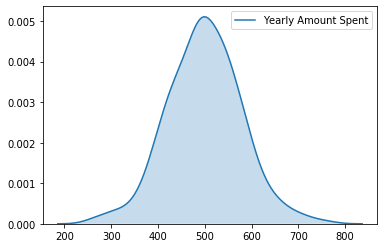

In [53]:
# Yearly Amount Spent
ax = sns.kdeplot(df['Yearly Amount Spent'],shade=True)

## Independent variables

In [54]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [55]:
df['domain'] = df['Email'].apply(lambda x: x.split('@')[1][:-4])
top_3 = df['domain'].value_counts().nlargest(3).index
df['domain'] = np.where(df['domain'].isin(top_3),df['domain'],'Other')
df['domain'].value_counts().sort_index()

Other      250
gmail       87
hotmail     87
yahoo       76
Name: domain, dtype: int64

### Drop insignificant variable

In [56]:
# drop email and address now
df.drop(columns=['Email','Address','Avatar'],inplace=True)

In [57]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent', 'domain'],
      dtype='object')

### Add dummy variable 

In [58]:
df = pd.get_dummies(data=df,columns=['domain'],drop_first=True)

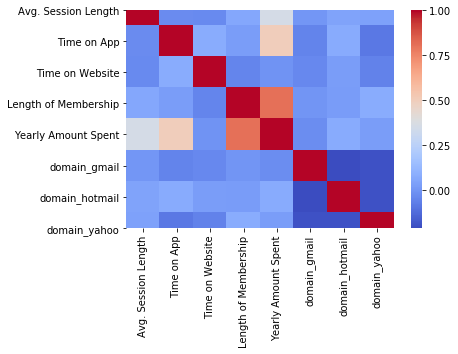

In [85]:
sns.heatmap(df.corr(),cmap='coolwarm')

# Modeling 

## OLS : Linear regression (Statistics)

In [59]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent', 'domain_gmail',
       'domain_hotmail', 'domain_yahoo'],
      dtype='object')

In [66]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'domain_gmail', 'domain_hotmail',
       'domain_yahoo'],
      dtype='object')

In [86]:
X = df.drop(columns=['Yearly Amount Spent','domain_gmail','domain_hotmail','domain_yahoo'])
y = df['Yearly Amount Spent']

In [93]:
# Xc = sm.add_constant(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.33,random_state=42)

In [94]:
lin_reg = sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          1.936e+04
Date:                 Thu, 10 Oct 2019   Prob (F-statistic):                   8.50e-215
Time:                         15:16:56   Log-Likelihood:                         -752.53
No. Observations:                  165   AIC:                                      1513.
Df Residuals:                      161   BIC:                                      1525.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     10.6329      1.423      7.473      0.000       7.823      13.443
Time on App             34.8549      1.821     19.143      0.000      31.259      38.450
Time on Website        -13.1290      1.354     -9.698      0.000     -15.803     -10.455
Length of Membership    60.7237      1.871     32.458      0.000      57.029      64.418
==============================================================================
Omnibus:                        0.890   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.915
Skew:                           0.021   Prob(JB):                        0.633
Kurtosis:                       2.638   Cond. No.                         55.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF

In [95]:
vif = [variance_inflation_factor(X_train.values,i) for i,_ in enumerate(X_train)]
pd.DataFrame({'vif':vif},index=X_train.columns)

,vif
Avg. Session Length,667.465394
Time on App,144.563561
Time on Website,752.745816
Length of Membership,14.489848


## Linear regression (ML)

In [97]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent', 'domain_gmail',
       'domain_hotmail', 'domain_yahoo'],
      dtype='object')

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [102]:
target = 'Yearly Amount Spent'
X = df.drop(columns = [target])
y = df[target]

In [99]:
X.shape, y .shape

((500, 7), (500,))

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

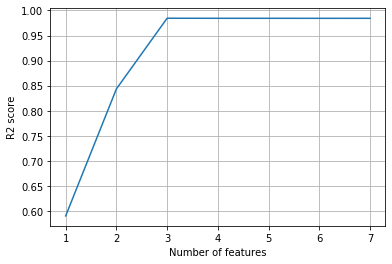

In [132]:
lr = LinearRegression()
n_features,scores = [],[]
for i,_ in enumerate(X_train.columns,1):
    rfe = RFE(lr,i)
    rfe.fit(X_train,y_train)
    y_pred = rfe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
    n_features.append(i)
    
plt.plot(n_features,scores)
plt.xticks(range(1,8,1))
plt.xlabel('Number of features')
plt.ylabel('R2 score')
plt.grid(True)
plt.show()

In [134]:
rfe = RFE(lr,3).fit(X_train,y_train)
r2_score(y_test,rfe.predict(X_test))

0.9845189764565013

In [129]:
rfe.ranking_

array([1, 1, 5, 1, 4, 3, 2])